In [488]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [489]:
claim = pd.read_csv("E:/ANALYTIXLAB/Assignments/PYTHON_ASSIGNMENTS/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")  


In [490]:
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [491]:
customer =  pd.read_csv("E:/ANALYTIXLAB/Assignments/PYTHON_ASSIGNMENTS/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

In [492]:
customer

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [493]:
print("claims table    -", claim.shape)
print("cutaomers table -", customer.shape)

claims table    - (1100, 10)
cutaomers table - (1085, 6)


In [494]:
customer_claim = claim.merge(customer , left_on = "customer_id" , right_on = "CUST_ID", how = "inner")

In [495]:
customer_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [496]:
numeric_variables = customer_claim.select_dtypes(include = ['float64', 'int64'])
numeric_variables

,claim_id,customer_id,total_policy_claims,CUST_ID
0,54004764,21868593,1.0,21868593
1,33985796,75740424,3.0,75740424
2,53522022,30308357,1.0,30308357
3,63017412,30308357,6.0,30308357
4,13015401,47830476,1.0,47830476
...,...,...,...,...
1080,62020796,79539873,1.0,79539873
1081,63269067,42364152,1.0,42364152
1082,22690595,19888166,2.0,19888166
1083,12376894,11256802,4.0,11256802


In [497]:
object_variables = customer_claim.select_dtypes(include = ['object'])
object_variables

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,Driver error,11/27/2017,Auto,No,Material only,$2980,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,Crime,10/03/2018,Home,Unknown,Material only,$2980,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,Driver error,04/04/2018,Auto,No,Material only,$1950,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,Natural causes,06/17/2018,Auto,No,Material only,$1680,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,Other causes,05/09/2017,Home,No,Material only,$2800,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,Other driver error,04/18/2017,Auto,No,Material only,$2840,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [498]:
def continuous_var_summary(x):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtypes, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 


# In[296]:


def categorical_var_summary(x):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['n', 'nmiss', 'MODE', 'FREQ', 'PERCENT'])


### 2 . AUDIT on continuoes variables and categorical variables

In [499]:
#categorical_var_summary(object_variables)

In [500]:
continuous_var_summary(numeric_variables["total_policy_claims"])

dtype           float64
cardinality           8
n_tot              1085
n                  1075
nmiss                10
perc_miss      0.921659
sum              1706.0
mean           1.586977
std            1.146859
var            1.315286
lc_iqr             -0.5
uc_iqr              3.5
min                 1.0
p1                  1.0
p5                  1.0
p10                 1.0
p25                 1.0
p50                 1.0
p75                 2.0
p90                 3.0
p95                 4.0
p99                 6.0
max                 8.0
dtype: object

###### Data type conversions for variables which are not of proper type


In [501]:
customer_claim["DateOfBirth"] = pd.to_datetime(customer_claim.DateOfBirth, format = "%d-%b-%y")
customer_claim.loc[(customer_claim.DateOfBirth.dt.year > 2020),"DateOfBirth"]=customer_claim[customer_claim.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))


In [502]:
customer_claim["claim_date"] = pd.to_datetime(customer_claim.claim_date, format = "%m/%d/%Y")

 #### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [503]:
customer_claim["claim_amount"]= customer_claim['claim_amount'].astype(str)
customer_claim['claim_amount'] =customer_claim['claim_amount'].str.replace('$','')
customer_claim['claim_amount']= np.where(customer_claim.claim_amount== "nan","",customer_claim.claim_amount )


<ipython-input-503-e13942b7d4ee>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  customer_claim['claim_amount'] =customer_claim['claim_amount'].str.replace('$','')


In [504]:
customer_claim['claim_amount'] = pd.to_numeric(customer_claim['claim_amount'])
np.dtype(customer_claim.claim_amount)

dtype('float64')

 #### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [505]:
customer_claim["unreported_claims"] = np.where(customer_claim["police_report"] == "Unknown",1,0)

In [506]:
customer_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

In [507]:
## we can check for duplicates and then drop the duplicates
customer_claim = customer_claim.drop_duplicates(subset="customer_id", keep= "last")

In [508]:
customer_claim.shape

(1078, 17)

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [509]:
#customer_claim.isna().sum()

In [510]:
customer_claim["claim_amount"]= customer_claim['claim_amount'].replace(np.NaN,customer_claim['claim_amount'].mean())
customer_claim["claim_amount"].isna().sum()

<ipython-input-510-5bf10d2317ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim["claim_amount"]= customer_claim['claim_amount'].replace(np.NaN,customer_claim['claim_amount'].mean())


0

In [511]:
customer_claim["total_policy_claims"] = customer_claim["total_policy_claims"].fillna(customer_claim["total_policy_claims"].mode()[0])

<ipython-input-511-0ed2fc9b90f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim["total_policy_claims"] = customer_claim["total_policy_claims"].fillna(customer_claim["total_policy_claims"].mode()[0])


In [512]:
customer_claim["total_policy_claims"].isna().sum()

0

In [513]:
customer_claim["total_policy_claims"]= customer_claim["total_policy_claims"].astype(str)

<ipython-input-513-1494433b627c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim["total_policy_claims"]= customer_claim["total_policy_claims"].astype(str)


In [514]:
customer_claim.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
unreported_claims      0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
###### Children < 18 
###### Youth 18-30 
###### Adult 30-60
###### Senior > 60

###### Some of the observations in the date of birth variable are not proper as we can observe it to be 2066


In [515]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(customer_claim['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year

In [516]:
customer_claim['age'] = (np.where(dob_year > curr_year,v,y))

<ipython-input-516-70feaa319460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim['age'] = (np.where(dob_year > curr_year,v,y))


In [517]:
customer_claim.loc[(customer_claim.age < 18),'AgeGroup'] = 'Children'
customer_claim.loc[(customer_claim.age >=18) & (customer_claim.age <30),'AgeGroup'] = 'Youth'
customer_claim.loc[(customer_claim.age >=30) & (customer_claim.age <60),'AgeGroup'] = 'Adult'
customer_claim.loc[(customer_claim.age >=60),'AgeGroup'] = 'Senior'


C:\Users\Dell\Anaconda3.0\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Dell\Anaconda3.0\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Dell\Anaconda3.0\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [518]:
customer_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1,36,Adult
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,45,Adult


In [519]:
customer_claim.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     795
Senior     75
Youth     208
Name: age, dtype: int64

### 8. What is the average amount claimed by the customers from various segments?

In [520]:
Avg_amount_segment= round(customer_claim.groupby(["Segment"])["claim_amount"].mean(),2)
Avg_amount_segment

Segment
Gold        12846.39
Platinum    12371.64
Silver      12267.15
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [521]:
#incidents reproted atleast 20 days prior to 1st october,2018  that is before 10th of september
# total claim amount for these incidents  ---- then finding sum of claimamount grouping by the incident_cause

In [522]:
round(customer_claim.loc[customer_claim.claim_date < "2018-09-10",:].groupby(by = "incident_cause")[["claim_amount"]].sum().add_prefix("total_"),2)

,total_claim_amount
incident_cause,
Crime,721937.45
Driver error,3315847.88
Natural causes,1312744.91
Other causes,3723147.30
Other driver error,3277533.37


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [523]:
adult_claim = customer_claim.groupby(by = ["State", "incident_cause" ] )[["claim_amount"]].count().reset_index()
adult_claim = adult_claim.rename(columns = {"claim_amount":"claim_amount_count"})

In [524]:
adult_claim.loc[ (adult_claim.incident_cause.str.lower().str.contains("driver")) & ((adult_claim.State == "AK") |(adult_claim.State == "TX") | (adult_claim.State == "DE")),:].groupby(["State","incident_cause"])[["claim_amount_count"]].sum()

claim_amount_count
State incident_cause                        
AK    Driver error                         6
      Other driver error                   4
DE    Driver error                        10
      Other driver error                   5
TX    Driver error                         6
      Other driver error                   4

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [525]:
Claim_gender_segment = round(customer_claim.groupby(["gender","Segment"])[["claim_amount"]].sum(),2).reset_index()
Claim_gender_segment

,gender,Segment,claim_amount
0,Female,Gold,2110042.41
1,Female,Platinum,2369720.43
2,Female,Silver,1897301.87
3,Male,Gold,2655966.87
4,Male,Platinum,2096443.42
5,Male,Silver,2347130.84


In [526]:
Claim_gender_segment_pivot = Claim_gender_segment.pivot(index = "Segment", columns = "gender",values = "claim_amount")
Claim_gender_segment_pivot

gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


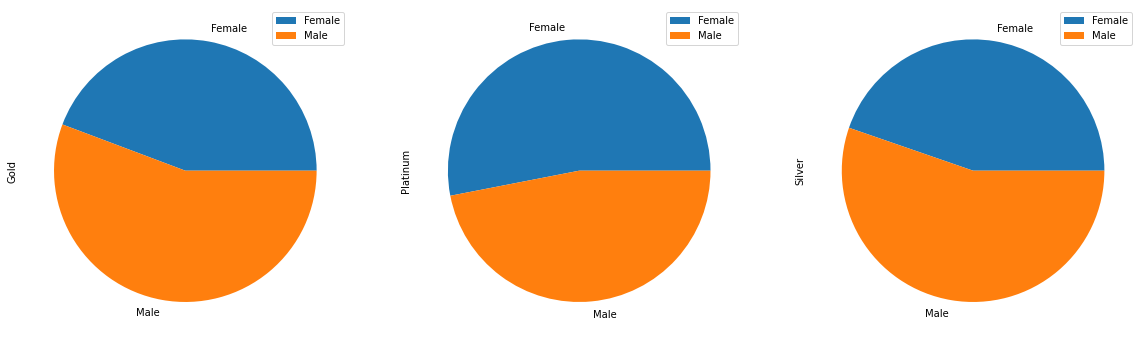

In [527]:
Claim_gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= True,figsize=(20,10))
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [528]:
gender_claim = customer_claim.loc[(customer_claim.incident_cause.str.lower().str.contains("driver")),:]

In [529]:
gender_claim = gender_claim.groupby(by= "gender")[["gender"]].count().add_prefix("countOf_").reset_index()

[]

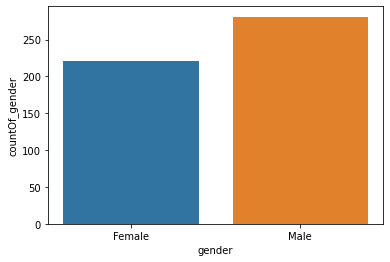

In [530]:
sns.barplot(x= "gender", y = "countOf_gender", data= gender_claim)
plt.plot()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [531]:
maxFraud_ageGroup = customer_claim.groupby(["fraudulent","AgeGroup"])[["fraudulent"]].count().add_prefix("countOf_").reset_index()
maxFraud_ageGroup

,fraudulent,AgeGroup,countOf_fraudulent
0,No,Adult,610
1,No,Senior,54
2,No,Youth,169
3,Yes,Adult,185
4,Yes,Senior,21
5,Yes,Youth,39


[]

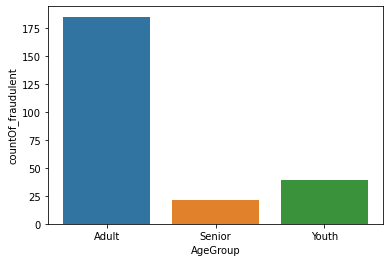

In [532]:
maxFraud_ageGroup = maxFraud_ageGroup.loc[((maxFraud_ageGroup.fraudulent)=="Yes") ]
sns.barplot(x= "AgeGroup", y="countOf_fraudulent", data= maxFraud_ageGroup)
plt.plot()

<ipython-input-533-12e529422534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim['Frauds'] = np.where(customer_claim['fraudulent'] == "Yes",1,0)


[]

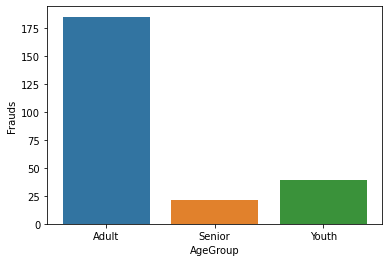

In [533]:
customer_claim['Frauds'] = np.where(customer_claim['fraudulent'] == "Yes",1,0)
customer_claim
AgeGroup_max_frauds= customer_claim.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
AgeGroup_max_frauds
sns.barplot(x= "AgeGroup", y="Frauds", data=AgeGroup_max_frauds )
plt.plot()


###  14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [534]:
customer_claim["claim_month"] = pd.to_datetime(customer_claim["claim_date"])
customer_claim["Claim_month"] = customer_claim["claim_date"].dt.month
customer_claim.head(2)

<ipython-input-534-5b30891f6ecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim["claim_month"] = pd.to_datetime(customer_claim["claim_date"])
<ipython-input-534-5b30891f6ecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim["Claim_month"] = customer_claim["claim_date"].dt.month


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup,Frauds,claim_month,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult,0,2017-11-27,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,1970-01-13,ME,265-543-1264,Silver,1,52,Adult,0,2018-10-03,10


In [535]:
customer_claim.groupby(["Claim_month","total_policy_claims"])[["total_policy_claims"]].count()


total_policy_claims
Claim_month total_policy_claims                     
1           1.0                                   77
            2.0                                   12
            3.0                                    6
            4.0                                    6
            5.0                                    2
...                                              ...
12          1.0                                   33
            2.0                                    5
            3.0                                    5
            4.0                                    2
            5.0                                    2

[71 rows x 1 columns]

### 15. What is the average claim amount for gender and age categories and  suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [580]:
# stats testing | hypothesis testing
import scipy.stats as stats

# statistical modelling
import statsmodels.formula.api as smf

# subpackages from sklearn for data handling, variable selection and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# for modelling - stats and ML
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import f_regression

In [581]:
Frauds_amount_gender= pd.DataFrame(customer_claim.loc[(customer_claim.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(customer_claim.loc[(customer_claim.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [582]:
Frauds_amount_gender

Fraud_claim_amount
gender AgeGroup                    
Female Adult           12630.098218
       Senior           3779.076923
       Youth            9220.450407
Male   Adult           16049.169551
       Senior          16879.125000
       Youth            7799.610535

In [583]:
Non_Frauds_amount_gender

Non_Fraud_claim_amount
gender AgeGroup                        
Female Adult               11982.026657
       Senior              14965.372409
       Youth               13174.536397
Male   Adult               12375.020071
       Senior              12607.765976
       Youth               12089.533384

In [584]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","AgeGroup"]),2)
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender AgeGroup                                            
Female Adult               12630.10                11982.03
       Senior               3779.08                14965.37
       Youth                9220.45                13174.54
Male   Adult               16049.17                12375.02
       Senior              16879.12                12607.77
       Youth                7799.61                12089.53

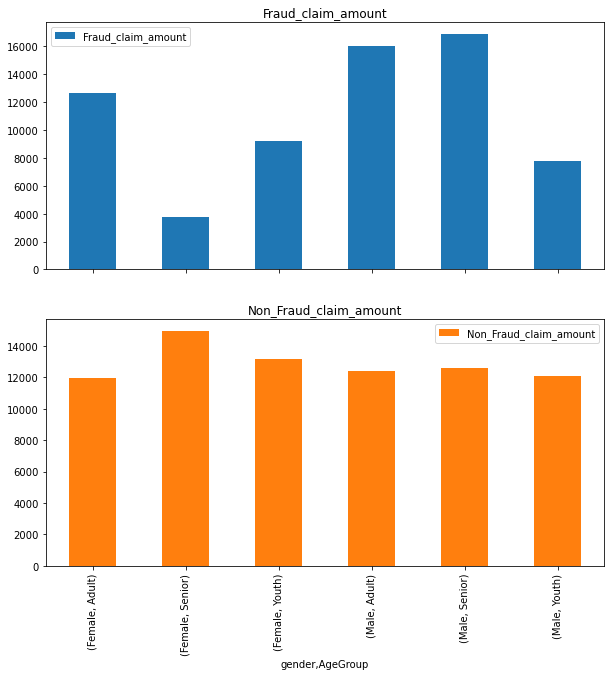

In [585]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.

### 16. Is there any similarity in the amount claimed by males and females?

In [586]:
claim_male = customer_claim['claim_amount'].loc[customer_claim['gender']=="Male"]
claim_female=customer_claim['claim_amount'].loc[customer_claim['gender']=="Female"]

In [587]:
claim_male
claim_male.mean()

12884.829631308425

In [588]:
claim_female
claim_female.mean()

12100.692029236623

In [589]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12884.829631308425
The average amount claimed by females is 12100.692029236623


In [590]:
#checking for equal variances 
eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic


0.9630529881732577

In [591]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic


0.9637241707490979

In [592]:
t= eq_var.statistic
p= eq_var.pvalue

In [593]:
print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('Thus We reject null hypothesis')
else:
    print('Thus We fail to reject null hypothesis')



 For the above test, the t-score is 0.9630529881732577 and the p-value is 0.3357373087404285
Thus We fail to reject null hypothesis


### 17. Is there any relationship between age category and segment?

In [594]:
# To find out this relationship we will use Chi Square test

# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment

agecat_seg = pd.crosstab(customer_claim.AgeGroup, customer_claim.Segment, margins = True)
agecat_seg


Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,272,266,257,795
Senior,28,26,21,75
Youth,71,69,68,208
All,371,361,346,1078


In [595]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test

(0.6654696397990999,
 0.999896981610665,
 9,
 array([[ 273.6038961 ,  266.22912801,  255.16697588,  795.        ],
        [  25.81168831,   25.11595547,   24.07235622,   75.        ],
        [  71.58441558,   69.65491651,   66.7606679 ,  208.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [596]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 0.6654696397990999 and the p value is 0.999896981610665


### 18.The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was  $10,000.

In [597]:
# Here we will check the pearson coeffecient.

# The H0 =  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Retionship exists;
# the CI= 95%, p=0.05

In [598]:
customer_claim["Year"]=customer_claim['claim_month'].dt.year
#current year as per the data given in 2018
Current_year= customer_claim.loc[customer_claim.Year == 2018]["claim_amount"]
amt_2016_17= customer_claim.loc[customer_claim.Year==2017]["claim_amount"]


<ipython-input-598-7e146e6e6788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim["Year"]=customer_claim['claim_month'].dt.year


In [612]:
Current_year.mean()

12766.279230540173

In [614]:
amt_2016_17.mean()

12285.735149288215

In [611]:
#performing pearson coeffecient
print(stats.pearsonr(Current_year,amt_2016_17.head(484)))

print(stats.pearsonr(Current_year,amt_2016_17.tail(484)))


(0.01102040074026485, 0.8089124688322884)
(-0.011159180814975078, 0.8065533715712296)


In [615]:
print("Hence , we fail to reject H0 and concludes that there is no relationship between the 2016-17 claim amounts and current claim amounts")

Hence , we fail to reject H0 and concludes that there is no relationship between the 2016-17 claim amounts and current claim amounts


### 19. Is there any difference between age groups and insurance claims?

In [ ]:
# Here we will perform Ftest ANOVA
# H0 : mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims or No influence of age groups on insurance claims) Ha : mean(AgeGroup[Youth]) != mean(AgeGroup[Adult]) (There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

In [569]:
age_group_1 = customer_claim['total_policy_claims'].loc[customer_claim['AgeGroup']=="Youth"]
age_group_1 

10      4.0
11      3.0
12      1.0
15      1.0
26      1.0
       ... 
1048    1.0
1067    5.0
1078    3.0
1081    1.0
1084    1.0
Name: total_policy_claims, Length: 208, dtype: object

In [570]:
age_group_2 = customer_claim['total_policy_claims'].loc[customer_claim['AgeGroup']=="Adult"]
age_group_2

0       1.0
1       3.0
3       6.0
5       1.0
7       2.0
       ... 
1076    3.0
1077    1.0
1080    1.0
1082    2.0
1083    4.0
Name: total_policy_claims, Length: 795, dtype: object

In [571]:
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')


The f-value is 0.9080839705107974 and the p value is 0.34085335479229917
We fail to reject null hypothesis


### 20.Is there any relationship between total number of policy claims and the claimed amount?

In [574]:
customer_claim['total_policy_claims'] = pd.to_numeric(customer_claim['total_policy_claims'])

<ipython-input-574-ac236b59ff85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_claim['total_policy_claims'] = pd.to_numeric(customer_claim['total_policy_claims'])


In [575]:
#Correlation
customer_claim.total_policy_claims.corr(other= customer_claim.claim_amount)
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.

-0.022392720732099896